<a href="https://colab.research.google.com/github/MuhammadAfaan/Data-Science_Labs/blob/main/DataScience_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("covid_19_clean_complete.csv")  #loading the dataset
#first 10 rows
df.head(10)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [ ]:
print("Dataset Shape (rows, cols):", df.shape)

print("Column Names and Data Types:")
print(df.dtypes)
#or use this
df.info()


# Identify missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())


Dataset Shape (rows, cols): (49068, 10)
Column Names and Data Types:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: 

In [ ]:
print("Descriptive Statistics:\n", df.describe())

#calculate mean, median and mode for 4 numerical coloums
key_features = ["Confirmed", "Deaths", 'Recovered', 'Active']
for col in key_features:
    print(f"\nStatistics for {col}:")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")

#analyzing catagorical data
categorical_columns = ["WHO Region", 'Country/Region']
for col in categorical_columns:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())

#numerical coloums for skewness of the data
numerical_columns = df.select_dtypes(include=[np.number]).columns
skewness = df[numerical_columns].skew()
print("\nSkewness of Numerical Columns:\n", skewness)


Descriptive Statistics:
                 Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e+05    6313.584411  5.480092e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  4.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.680000e+02       2.000000  2.900000e+01   
75%       41.204380     80.771797  1.518250e+03      30.000000  6.660000e+02   
max       71.706900    178.065000  4.290259e+06  148011.000000  1.846641e+06   

             Active  
count  4.906800e+04  
mean   8.085012e+03  
std    7.625890e+04  
min   -1.400000e+01  
25%    0.000000e+00  
50%    2.600000e+01  
75%    6.060000e+02  
max    2.816444e+06  

Statistics for Confirmed:
Mean: 16884.90425531915
Media

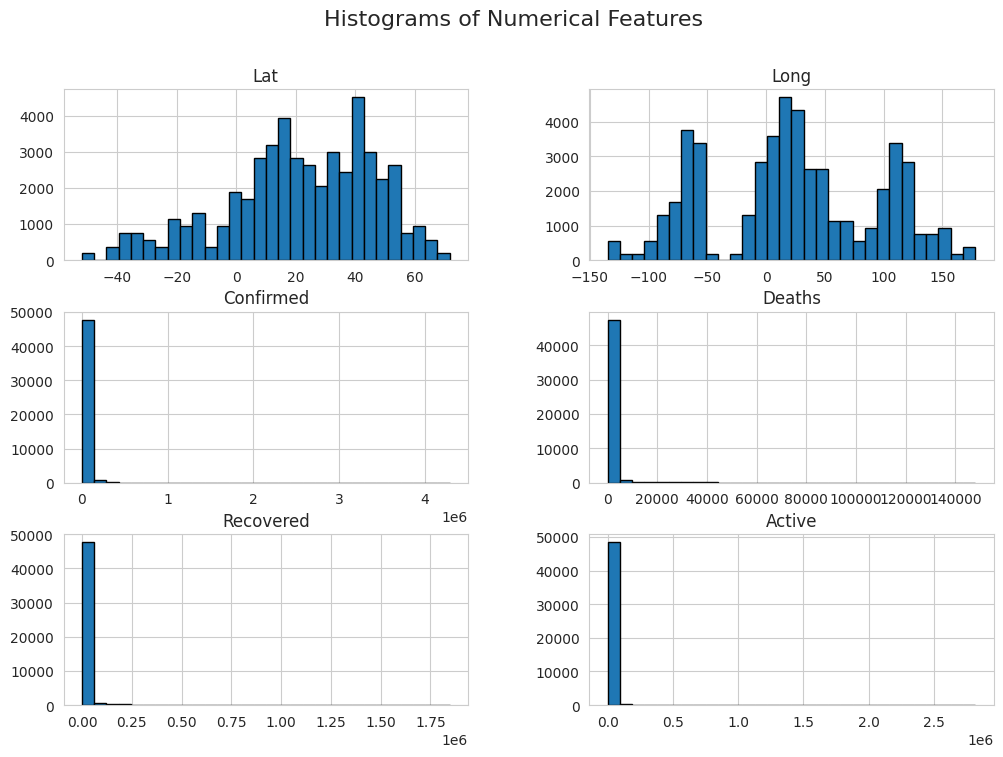

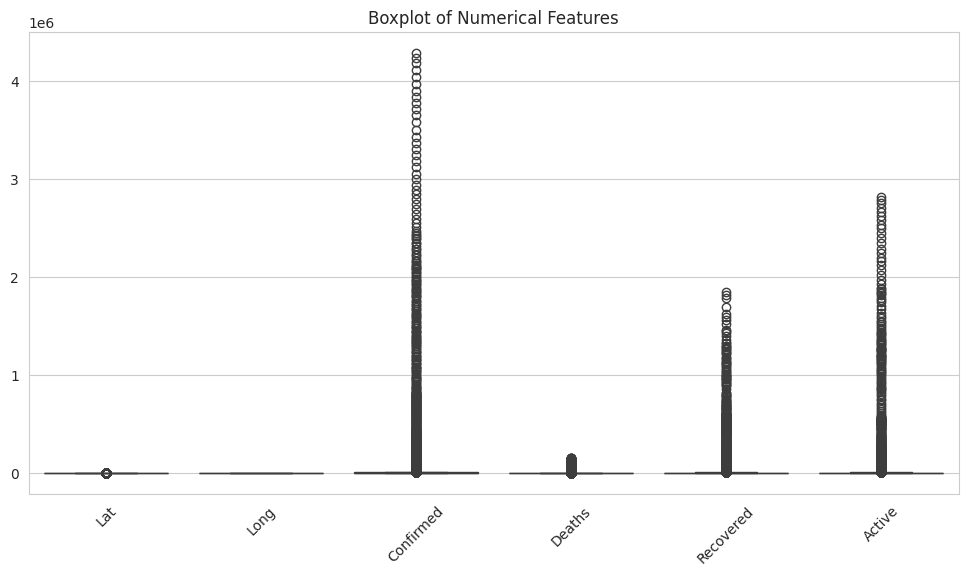

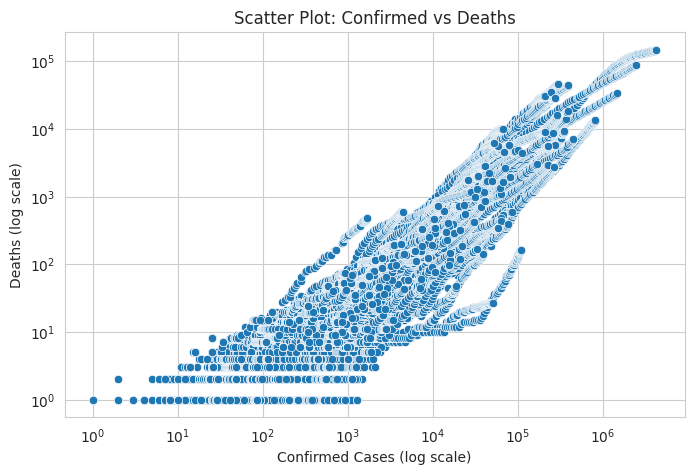

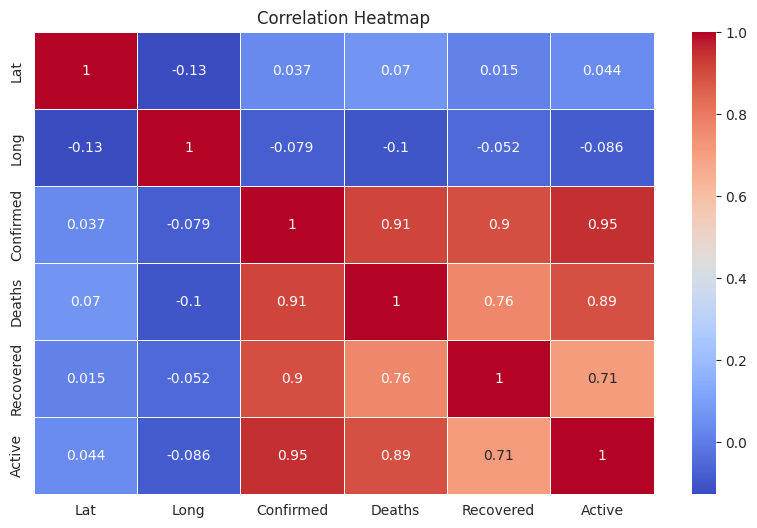

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# setting the style
sns.set_style("whitegrid")
# selecting numerical coloums
numeric_df = df.select_dtypes(include=[np.number])
# compute coreelation matrix
correlation_matrix = numeric_df.corr()

# histograms for numerical features
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# boxplot for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

# scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Confirmed"], y=df["Deaths"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Confirmed Cases (log scale)")
plt.ylabel("Deaths (log scale)")
plt.title("Scatter Plot: Confirmed vs Deaths")
plt.show()

# heat map
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# fill numerical values with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# filling missing values for categorical data
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# checking for missing values now
print(df.isnull().sum())

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64


<ipython-input-21-b075bbb27895>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
top_5_correlated = correlation_unstacked[correlation_unstacked.index.get_level_values(0) != correlation_unstacked.index.get_level_values(1)]
top_5_correlated = top_5_correlated.groupby(level=0).first().nlargest(5)

print("Top 5 Most Correlated Feature Pairs:\n", top_5_correlated)


Top 5 Most Correlated Feature Pairs:
 Active       0.950255
Confirmed    0.950255
Deaths       0.912361
Recovered    0.895506
Lat          0.070040
dtype: float64
